# Taller 10 - Twitter

In [1]:
import pandas as pd
import tweepy

import re
from pprint import pprint

from nltk.corpus import stopwords
stopwords = stopwords.words('spanish')

In [9]:
# Autorizar a través API
logueo = tweepy.OAuthHandler(keys['api_key'], keys['api_key_secret'])
logueo.set_access_token(keys['access_token'], keys['access_token_secret'])
api = tweepy.API(logueo, wait_on_rate_limit=True)

Recolectar Información

In [10]:
tweets = tweepy.Cursor(api.search,
                       q=['netflix -RT'],
                       lang='es',
                       geocode=f'4.649178,-74.062827,45mi',
                       tweet_mode='extended',
                       include_rts=False).items(300)

In [11]:
for t in tweets:
    print (t)
    break

Status(_api=<tweepy.api.API object at 0x00000237E9F43B88>, _json={'created_at': 'Sat Nov 14 12:45:52 +0000 2020', 'id': 1327593590856560650, 'id_str': '1327593590856560650', 'full_text': '@NetflixES Porque nadie la vería, se quebraría Netflix, sería la última serie de Netflix. El final de una era.', 'truncated': False, 'display_text_range': [11, 110], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'NetflixES', 'name': 'Netflix España', 'id': 3143260474, 'id_str': '3143260474', 'indices': [0, 10]}], 'urls': []}, 'metadata': {'iso_language_code': 'es', 'result_type': 'recent'}, 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'in_reply_to_status_id': 1326845868604076037, 'in_reply_to_status_id_str': '1326845868604076037', 'in_reply_to_user_id': 3143260474, 'in_reply_to_user_id_str': '3143260474', 'in_reply_to_screen_name': 'NetflixES', 'user': {'id': 141619279, 'id_str': '141619279', 'name': 'Yefry A. Aragón Jo

In [12]:
t._json

{'created_at': 'Sat Nov 14 12:45:52 +0000 2020',
 'id': 1327593590856560650,
 'id_str': '1327593590856560650',
 'full_text': '@NetflixES Porque nadie la vería, se quebraría Netflix, sería la última serie de Netflix. El final de una era.',
 'truncated': False,
 'display_text_range': [11, 110],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [{'screen_name': 'NetflixES',
    'name': 'Netflix España',
    'id': 3143260474,
    'id_str': '3143260474',
    'indices': [0, 10]}],
  'urls': []},
 'metadata': {'iso_language_code': 'es', 'result_type': 'recent'},
 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
 'in_reply_to_status_id': 1326845868604076037,
 'in_reply_to_status_id_str': '1326845868604076037',
 'in_reply_to_user_id': 3143260474,
 'in_reply_to_user_id_str': '3143260474',
 'in_reply_to_screen_name': 'NetflixES',
 'user': {'id': 141619279,
  'id_str': '141619279',
  'name': 'Yefry A. Aragón Joya',
  'screen_name': 'ya

In [13]:
t = []

for tweet in tweets:
    temp = []
    temp.append(tweet.full_text)
    temp.append(tweet.created_at)
    temp.append("Bogotá")
    temp.append(tweet.user.location)
    temp.append(tweet.id)
    temp.append(f"https://twitter.com/i/web/status/{tweet.id}")
    
    t.append(temp)
    

In [14]:
datos = pd.DataFrame(t)

In [15]:
datos.columns = ['tweet', 'date', 'city', 'user_location', 'id', 'link']
datos.head()

,tweet,date,city,user_location,id,link
0,Vi el documental sobre el papa que hay en Netf...,2020-11-14 12:24:08,Bogotá,Bogotá,1327588124000706562,https://twitter.com/i/web/status/1327588124000...
1,Tío Netflix esta sobreactuando con las películ...,2020-11-14 12:07:50,Bogotá,"Pereira, Colombia",1327584021946175489,https://twitter.com/i/web/status/1327584021946...
2,"@lagordaniembro La mayoría de las que son ""Net...",2020-11-14 11:33:11,Bogotá,Bogotá,1327575302344728577,https://twitter.com/i/web/status/1327575302344...
3,"@TheWereDrunk La serie está en Netflix, perten...",2020-11-14 11:11:43,Bogotá,"Bogotá, Colombia",1327569897015144449,https://twitter.com/i/web/status/1327569897015...
4,La verdá les pido que la vean para que Netflix...,2020-11-14 07:08:04,Bogotá,"Bogotá, Colombia",1327508582716350464,https://twitter.com/i/web/status/1327508582716...


Preprocesamiento para Tweets

In [16]:
datos = datos[['tweet','date','city']]
datos.head()

,tweet,date,city
0,Vi el documental sobre el papa que hay en Netf...,2020-11-14 12:24:08,Bogotá
1,Tío Netflix esta sobreactuando con las películ...,2020-11-14 12:07:50,Bogotá
2,"@lagordaniembro La mayoría de las que son ""Net...",2020-11-14 11:33:11,Bogotá
3,"@TheWereDrunk La serie está en Netflix, perten...",2020-11-14 11:11:43,Bogotá
4,La verdá les pido que la vean para que Netflix...,2020-11-14 07:08:04,Bogotá


In [17]:
def pre_procesado(texto):
    texto = texto.lower()
    texto = re.sub(r"[\W\d_]+", " ", texto)
    texto = [palabra for palabra in texto.split() if palabra not in stopwords]
    return texto


In [18]:

datos['tweet_p'] = datos['tweet'].apply(lambda texto: pre_procesado(texto))

datos.head()

,tweet,date,city,tweet_p
0,Vi el documental sobre el papa que hay en Netf...,2020-11-14 12:24:08,Bogotá,"[vi, documental, papa, netflix, final, puse, l..."
1,Tío Netflix esta sobreactuando con las películ...,2020-11-14 12:07:50,Bogotá,"[tío, netflix, sobreactuando, películas, navidad]"
2,"@lagordaniembro La mayoría de las que son ""Net...",2020-11-14 11:33:11,Bogotá,"[lagordaniembro, mayoría, netflix, original]"
3,"@TheWereDrunk La serie está en Netflix, perten...",2020-11-14 11:11:43,Bogotá,"[theweredrunk, serie, netflix, pertenece, catá..."
4,La verdá les pido que la vean para que Netflix...,2020-11-14 07:08:04,Bogotá,"[verdá, pido, vean, netflix, cancele, tener, q..."


In [19]:
datos.tweet_p.iloc[1]

['tío', 'netflix', 'sobreactuando', 'películas', 'navidad']

In [20]:
datos.tweet.iloc[1]

'Tío Netflix esta sobreactuando con las películas de navidad'

In [21]:
import re

pattern1 = '?P<pic>pic.twitter.com/[^\s]+'
pattern2 = '?P<url>https?://[^\s]+'

def text_clean(row):
    text = row['tweet_p']
    
    links = [tuple(j for j in i if j)[-1] for i in re.findall(f"({pattern1})|({pattern2})",text)]
    for link in links:
        text = text.replace(link,"")
             
    hashtags = [interaction for interaction in text.split() if interaction.startswith("#")]
    for hashtag in hashtags:
        text = text.replace(hashtag,"")
        
    mentions = [interaction for interaction in text.split() if interaction.startswith("@")]
    for mention in mentions:
        text = text.replace(mention,"")
        
    return text, links, hashtags, mentions

In [ ]:
datos[['tweet_clean', 'links_2', 'hashtags', 'mentions']] = datos.apply(text_clean, axis=1, result_type='expand')

In [22]:
datos.head()

,tweet,date,city,tweet_p
0,Vi el documental sobre el papa que hay en Netf...,2020-11-14 12:24:08,Bogotá,"[vi, documental, papa, netflix, final, puse, l..."
1,Tío Netflix esta sobreactuando con las películ...,2020-11-14 12:07:50,Bogotá,"[tío, netflix, sobreactuando, películas, navidad]"
2,"@lagordaniembro La mayoría de las que son ""Net...",2020-11-14 11:33:11,Bogotá,"[lagordaniembro, mayoría, netflix, original]"
3,"@TheWereDrunk La serie está en Netflix, perten...",2020-11-14 11:11:43,Bogotá,"[theweredrunk, serie, netflix, pertenece, catá..."
4,La verdá les pido que la vean para que Netflix...,2020-11-14 07:08:04,Bogotá,"[verdá, pido, vean, netflix, cancele, tener, q..."


In [32]:
import numpy as np

from wordcloud import WordCloud
from wordcloud import ImageColorGenerator

from nltk.corpus import stopwords
stopwords = stopwords.words('spanish')

import matplotlib.pyplot as plt
import PIL.Image
from IPython.display import display

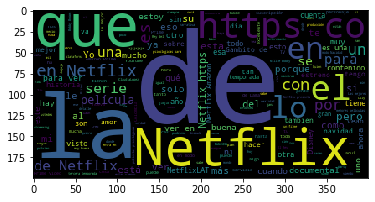

In [33]:

from wordcloud import WordCloud
from wordcloud import ImageColorGenerator

import matplotlib.pyplot as plt
import PIL.Image
from IPython.display import display

palabras = datos.tweet.str.cat(sep=" ")
wordcloud = WordCloud().generate(palabras)

plt.imshow(wordcloud)
plt.show()

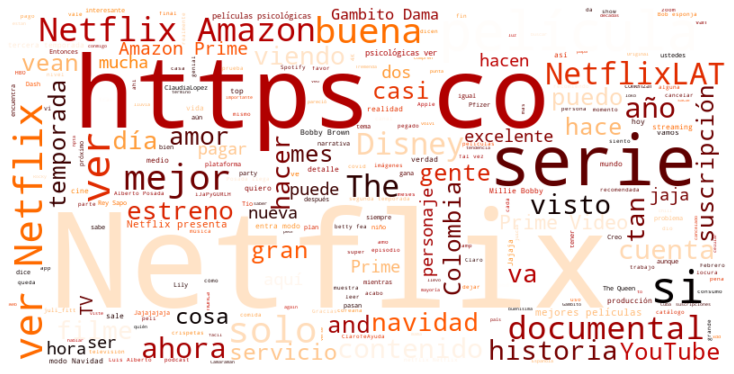

In [34]:
palabras = datos.tweet.str.cat(sep=' ')

wordcloud = WordCloud(width=800, height=400, # Ajustamos el tamaño
                     max_font_size=150, max_words=250,
                     background_color='white', colormap='gist_heat',
                     stopwords=stopwords).generate(palabras) # https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off") #apaga el eje para que no se visualice
plt.tight_layout(pad=0)
plt.show()